In [1]:
###### importing dependencies #############################################
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.metrics import plot_confusion_matrix

import cryptoaml.datareader as cdr
from cryptoaml.models import XgboostAlgo

In [2]:
data = cdr.get_data("elliptic")
data_sets = data.train_test_split(train_size=0.7, 
                                  feat_set=["LF"], 
                                  inc_meta=False)

In [3]:
# collection of trained models 
models = OrderedDict()

# load xgboost from exp. 1 
xgb = XgboostAlgo(persist_props={
    "method": "load",
    "load_path": "saved_models/experiment_1/tuned/LF/xg_boost"
})
models[xgb.model_name_] = xgb
models[xgb.model_name_ + "1"] = xgb
models[xgb.model_name_ + "2"] = xgb
models[xgb.model_name_ + "3"] = xgb

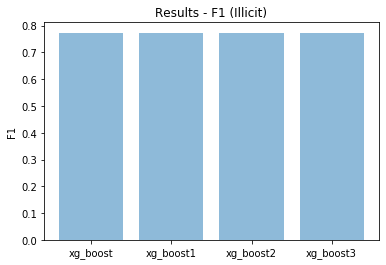

[0.7734138972809667, 0.7734138972809667, 0.7734138972809667, 0.7734138972809667]


In [4]:
# display results 

def plot_feature_importance(models):
    for key, value in models.items():
        value.feature_importances_.plot.bar(figsize=(18,5))
        plt.xlabel("Feature Importance Score [{0}]".format(key))
        plt.show()

def plot_performance(models, test_X, test_y):
    f1 = []
    model_names = models.keys()
    for key, value in models.items():
        tmp_results = value.evaluate(metrics=["precision", "recall", "f1", "f1_micro", "confusion"], 
                                     X=data_sets["LF"].test_X, 
                                     y=data_sets["LF"].test_y)
        
        f1.append(tmp_results["f1"])
        
    y_pos = np.arange(len(model_names))
    plt.bar(y_pos, f1, align='center', alpha=0.5)
    plt.xticks(y_pos, model_names)
    plt.ylabel("F1")
    plt.title("Results - F1 (Illicit)")

    plt.show()
    
    print(f1)
        
# show_feature_importance(models)

plot_performance(models, data_sets["LF"].test_X, data_sets["LF"].test_y)

# perf_results = xgb.evaluate(metrics=["precision", "recall", "f1", "f1_micro", "confusion"], 
#                             X=data_sets["LF"].test_X, 
#                             y=data_sets["LF"].test_y)
# print(perf_results)